#                Importing Libraries

In [39]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix

In [15]:
train_data = pd.read_csv("train.csv")
train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [42]:
import pandas_profiling
train_data.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [17]:
train_data = train_data.drop(columns=["Loan_ID"])

catego_col = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
numeric_col = ['ApplicantIncome','CoapplicantIncome','LoanAmount']


print(catego_col)
print(numeric_col)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


# Data Visualization libraries

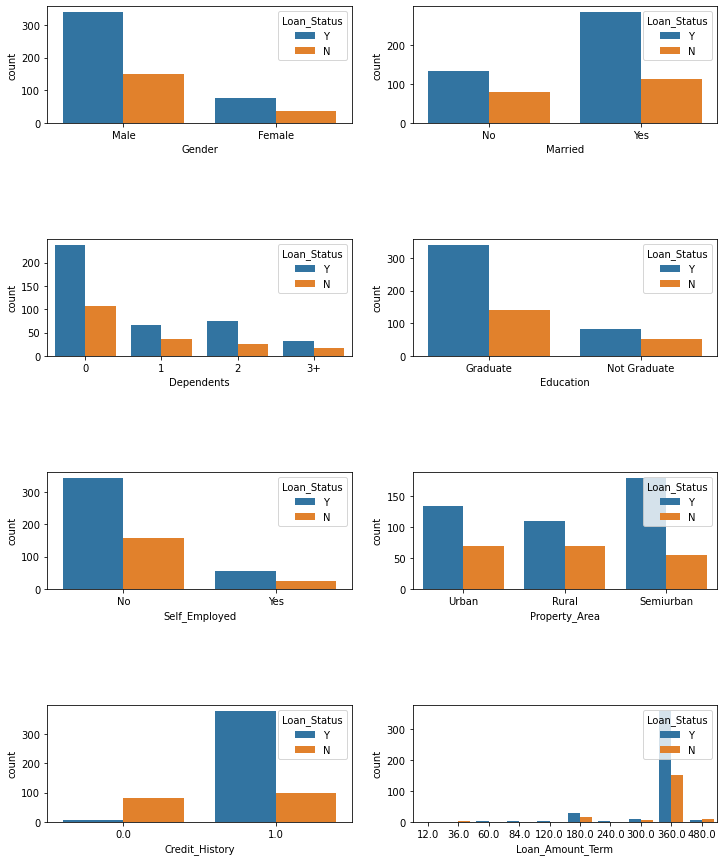

In [18]:
fig,axes = plt.subplots(4,2,figsize=(12,15))

for idx,cat_col in enumerate(catego_col):
    row,col = idx//2,idx%2 
    
    sns.countplot(x=cat_col,data=train_data,hue="Loan_Status",ax=axes[row,col])
    
    
plt.subplots_adjust(hspace=1)

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  592.000000
mean       5403.459283        1621.245798  146.412162
std        6109.041673        2926.248369   85.587325
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.000000
50%        3812.500000        1188.500000  128.000000
75%        5795.000000        2297.250000  168.000000
max       81000.000000       41667.000000  700.000000


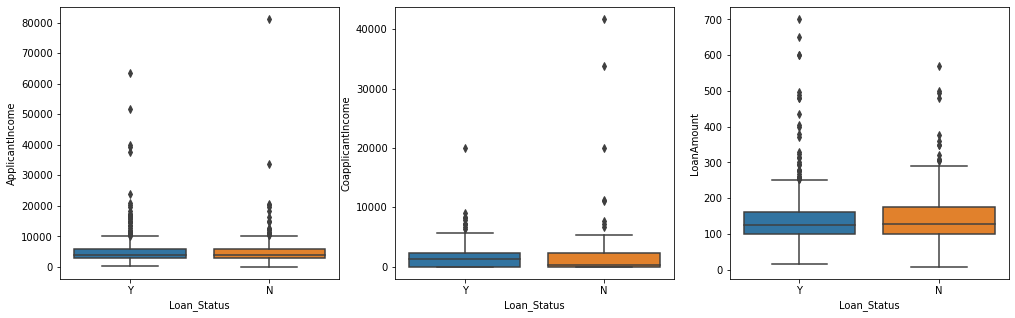

In [19]:
fig,axes = plt.subplots(1,3,figsize=(17,5))

for idx , cat_col in enumerate(numeric_col):
    sns.boxplot(y=cat_col,data=train_data,x="Loan_Status",ax=axes[idx])
    
print(train_data[numeric_col].describe())
plt.subplots_adjust(hspace=1)

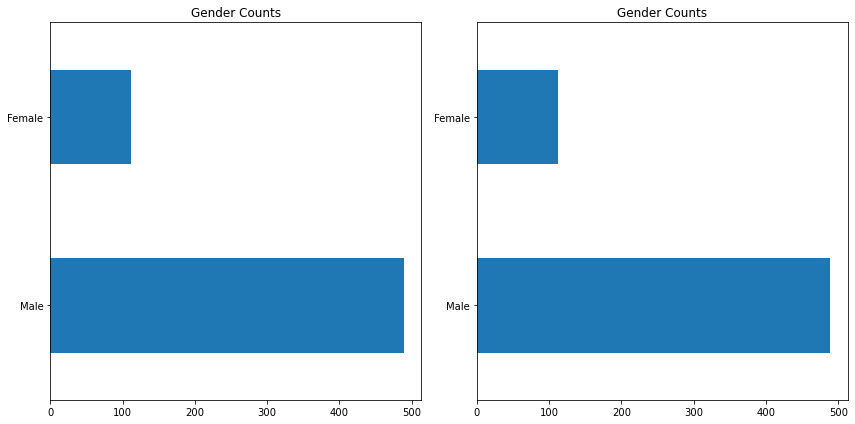

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Create a figure with two subplots

train_data["Gender"].value_counts()[:30].plot(kind='barh', ax=axes[0], title="Gender Counts")
# Plot the first plot on the first subplot

train_data["Gender"].value_counts()[:30].plot(kind='barh', ax=axes[1], title="Gender Counts")

plt.tight_layout()  # Adjust the spacing between plots
plt.show()  # Display the plots

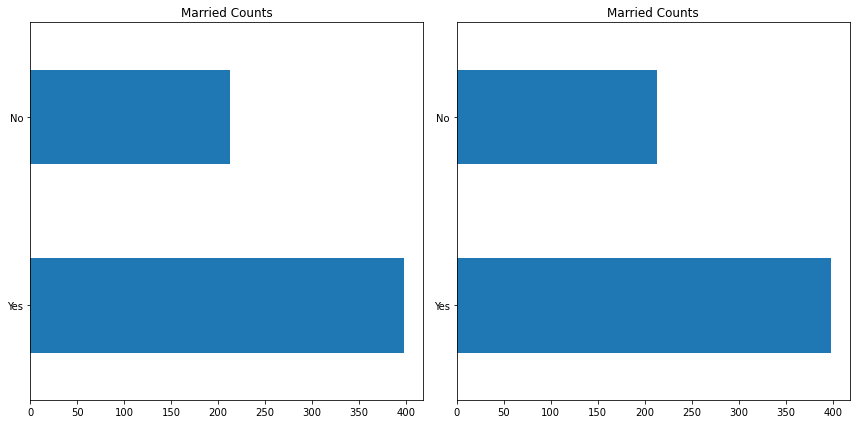

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Create a figure with two subplots

train_data["Married"].value_counts()[:30].plot(kind='barh', ax=axes[0], title="Married Counts")

train_data["Married"].value_counts()[:30].plot(kind='barh', ax=axes[1], title="Married Counts")

plt.tight_layout()  # Adjust the spacing between plots
plt.show()  # Display the plots

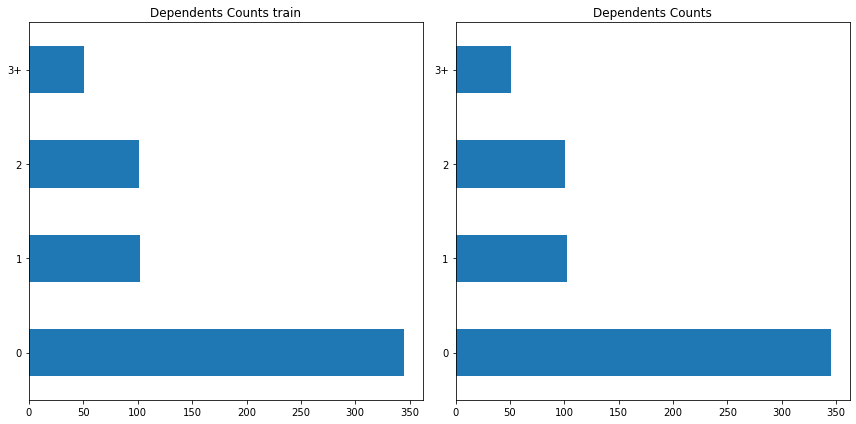

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Create a figure with two subplots

train_data["Dependents"].value_counts()[:30].plot(kind='barh', ax=axes[0], title="Dependents Counts train")

train_data["Dependents"].value_counts()[:30].plot(kind='barh', ax=axes[1], title="Dependents Counts")

plt.tight_layout()  # Adjust the spacing between plots
plt.show()  # Display the plots

In [20]:
train_df_encoded = pd.get_dummies(train_data,drop_first=True)
train_df_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,NaN,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1


In [21]:
x = train_df_encoded.drop(columns="Loan_Status_Y")
y = train_df_encoded["Loan_Status_Y"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y, random_state=42)

imp = SimpleImputer(strategy="mean")
imp_train = imp.fit(x_train)
x_train = imp_train.transform(x_train)
x_test_imp = imp_train.transform(x_test)

# Model 1: Decision Tree Classifier

In [24]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(x_train,y_train)
y_pred = tree_clf.predict(x_train)

print("Training Dataset Accuracy : ",accuracy_score(y_train,y_pred))
print("Training Data F1 Score ", f1_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(tree_clf,x_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,x_train,y_train,cv=5,scoring='accuracy').mean())

Training Dataset Accuracy :  1.0
Training Data F1 Score  1.0
Validation Mean F1 Score:  0.6338400439649975
Validation Mean Accuracy:  0.6924963924963925


Training Accuracy > Test Accuracy with default settings of Decision Tree classifier. Hence, model is overfit. We will try some Hyper-parameter tuning

# First let's try tuning 'Max_Depth' of tree

<AxesSubplot:xlabel='Max_Depth', ylabel='Values'>

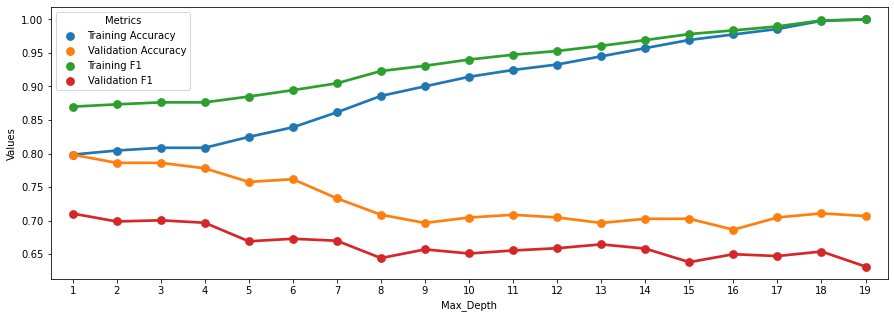

In [32]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
tree_depths = []

for depth in range(1,20):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(x_train,y_train)
    y_training_pred = tree_clf.predict(x_train)
    
    
    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    
    val_mean_f1 = cross_val_score(tree_clf,x_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,x_train,y_train,cv=5,scoring='accuracy').mean()

    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    tree_depths.append(depth)
    

Tuning_Max_depth = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Max_Depth": tree_depths }
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)

plot_df = Tuning_Max_depth_df.melt('Max_Depth',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Max_Depth", y="Values",hue="Metrics", data=plot_df,ax=ax)

we can conclude that keeping 'Max_Depth' = 3 will yield optimum Test accuracy and F1 score Optimum Test Accuracy ~ 0.805; Optimum F1 Score: ~0.

Let's use this Decision Tree classifier on unseen test data and evaluate Test Accuracy, F1 Score and Confusion Matrix

In [40]:
tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf = 35)
tree_clf.fit(x_train,y_train)
y_pred = tree_clf.predict(x_test_imp)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8536585365853658
Test F1 Score:  0.903225806451613
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,21,17,38
1,1,84,85
All,22,101,123
